In [1]:
%matplotlib inline
import scipy.stats as sct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ipywidgets import interact, fixed
import glob
import pickle
from pprint import pprint
import os
from PIL import Image
from tqdm import tqdm

In [2]:
# %%html
# <style>
# div.input {
#     display:none;
# }
# </style>

In [3]:
def loadfile(getfilename):
    filename = glob.glob(getfilename)[0]
    with open(filename, 'rb') as f:
        variable = pickle.load(f)
    return variable

## 10回平均をとって１σ，２σ，３σ，４σ，５σ
- １〜５σで10回づつ行い，学習した枚数ごとに平均を取ったもの
- シード値によってrejectされる枚数が異なるため，10回のうち最も枚数が少ないものに合わせて平均をとる
- carpetとgridのグラフの縦軸のレンジは他のものと違う

# 間違えてる
```python
if (gooddef_threshold <= def_d)
    print("[[[Reject]]]")
    continue
```
閾値を上回ったものがrejectされている

## poisson fitting failed ?

In [4]:
def plot_ac(ms, auclog, color=None):
    plt.plot(auclog, label="{0}σ, Max={1:.3f}".format(ms, max(auclog)), color=color)

In [5]:
dirname = 'output4all_reject_10_sigma_wrong/'
def show_eachresult_reject(classn, n_layer, threshold, mul_sigs, ONE=False):
    plt.rcParams['figure.figsize'] = (15.0, 5.0)
    plt.figure()
    
    
    plt.subplot(1, 2, 1)
    plt.title("AUC with Reject")
    plt.xlabel("Number of Defective Images")
    plt.ylabel("AUC with Reject")
    plt.ylim(0.8, 1)
    if classn=='carpet':
        plt.ylim(0.7, 0.9)
    elif classn=='grid':
        plt.ylim(0.4, 0.6)
    for ms in mul_sigs:
        dirname1 = dirname + classn + '._mbn_1.0.{0}.*.{1}.{2}'.format(n_layer, threshold, ms)
        auclogs = glob.glob(os.path.join(dirname1, "AUClog*.pcl"))
        auclog1 = []
        for aul in auclogs:
            auclog1.append(loadfile(aul))
            avg_auclog1 = []
            for itm in zip(*auclog1):
                avg_auclog1.append(np.mean(itm))
        if ONE:
            avg_auclog1 = auclog1[0]
        plot_ac(ms, avg_auclog1)
    plt.legend()
    
    
    plt.subplot(1, 2, 2)
    plt.title("Accuracy with Reject [%]")
    plt.xlabel("Number of Defective Images")
    plt.ylabel("Accuracy with Reject [%]")
    plt.ylim(0, 1)
    for ms in mul_sigs:
        dirname1 = dirname + classn + '._mbn_1.0.{0}.*.{1}.{2}'.format(n_layer, threshold, ms)
        acclogs = glob.glob(os.path.join(dirname1, "ACClog*.pcl"))
        acclog1 = []
        for acl in acclogs:
            acclog1.append(loadfile(acl))
            avg_acclog1 = []
            for itm in zip(*acclog1):
                avg_acclog1.append(np.mean(itm))
            if ONE:
                avg_acclog1 = acclog1[0]
        plot_ac(ms, avg_acclog1)
    plt.legend()

bottle


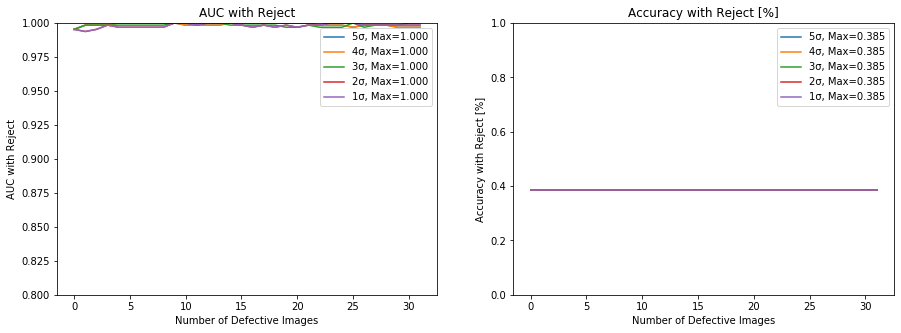

cable


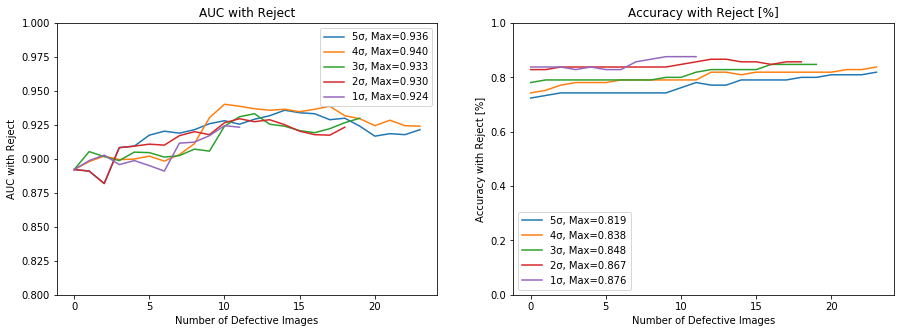

capsule


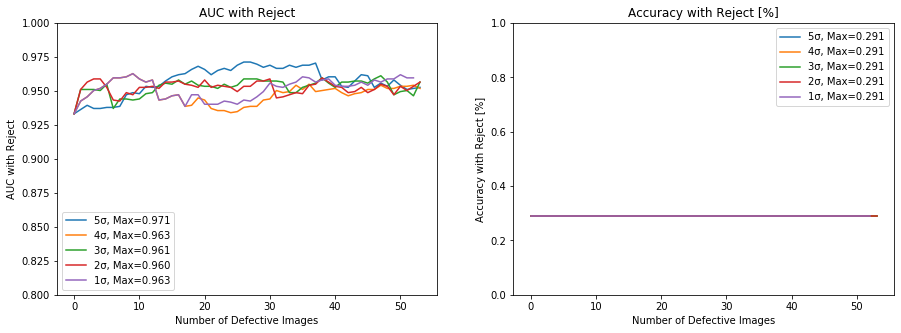

carpet


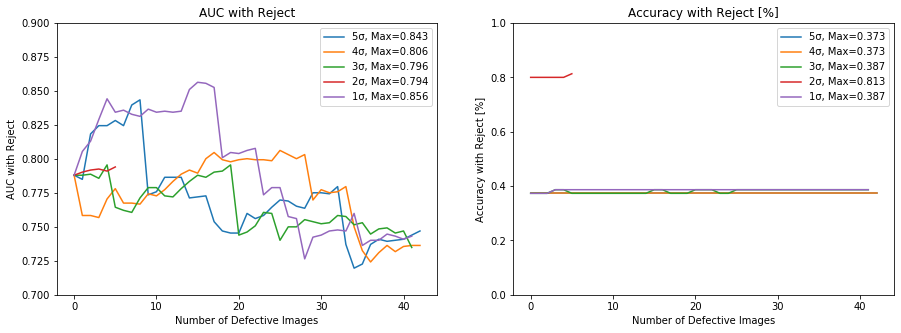

grid


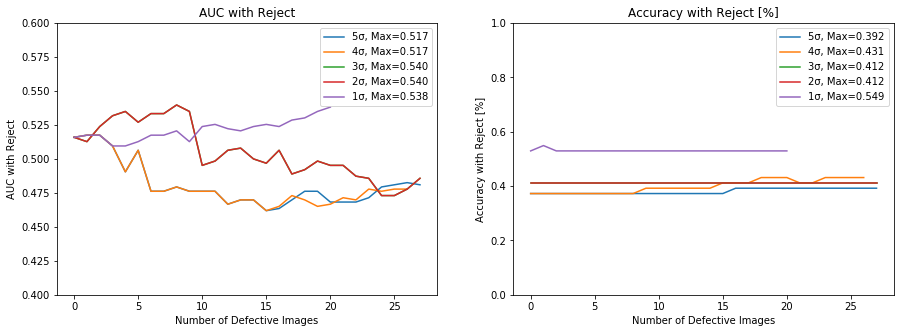

hazelnut


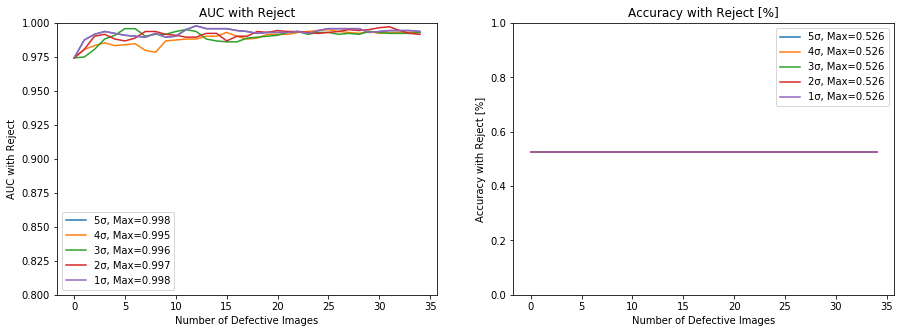

leather


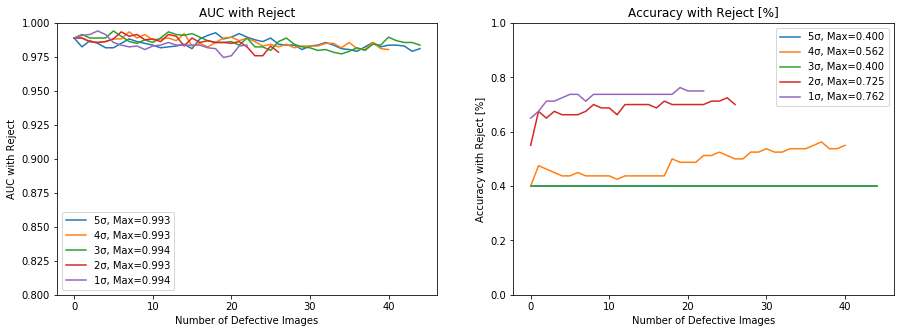

metal_nut


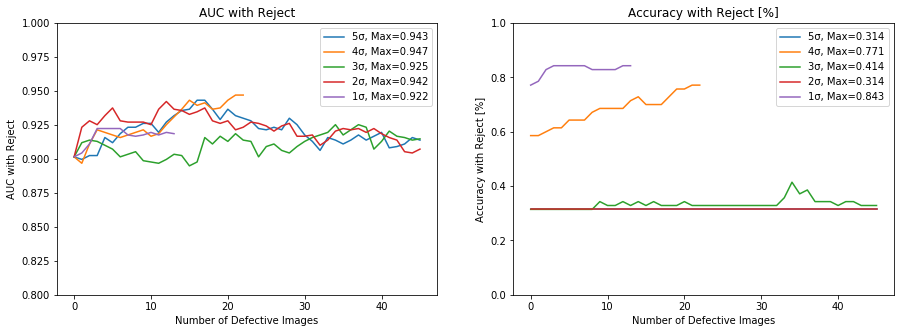

pill


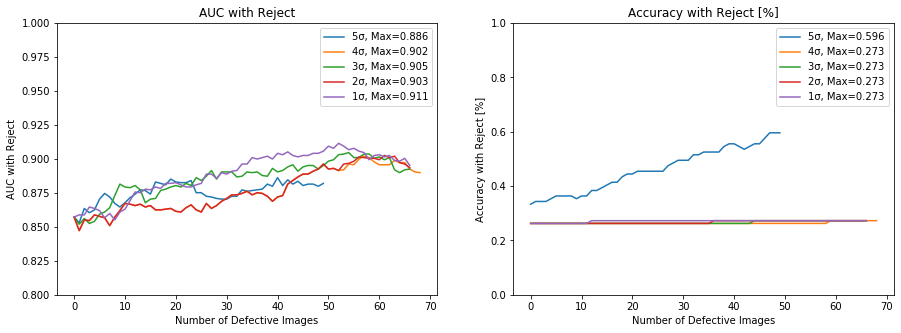

screw


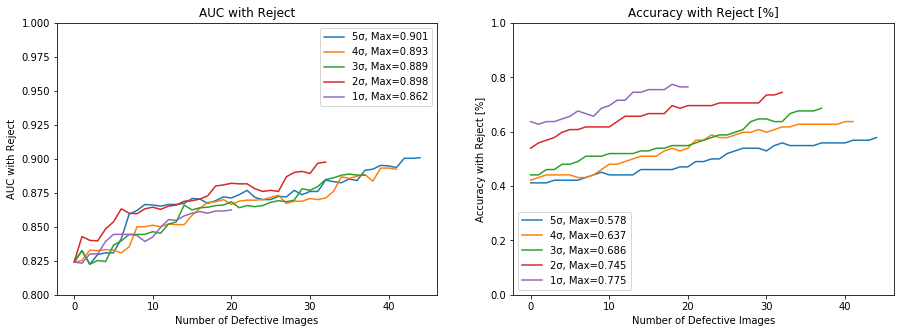

tile


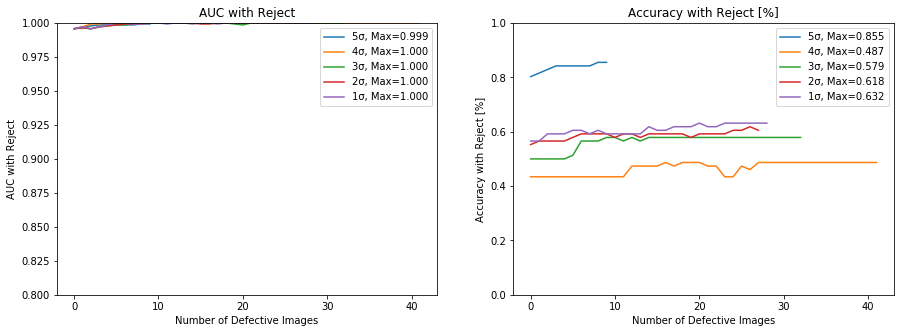

toothbrush


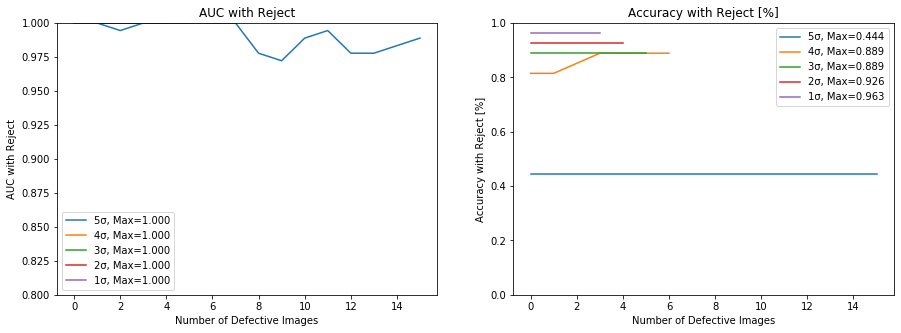

transistor


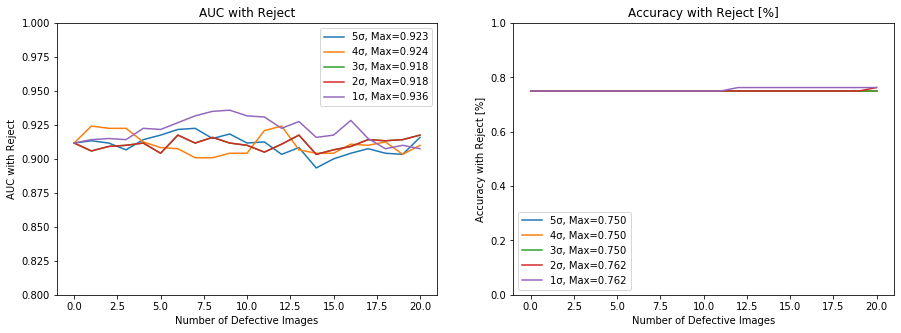

wood


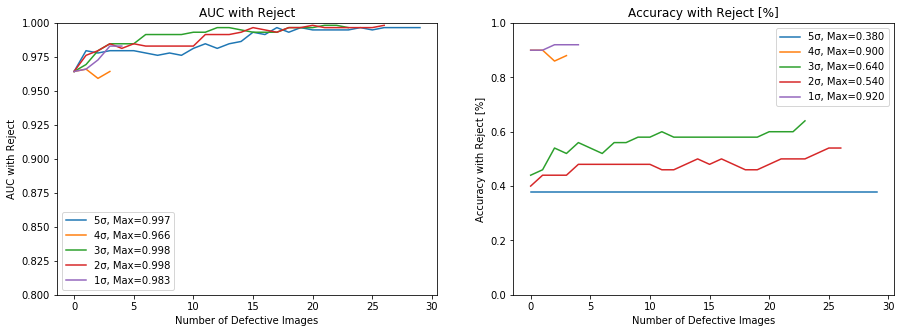

zipper


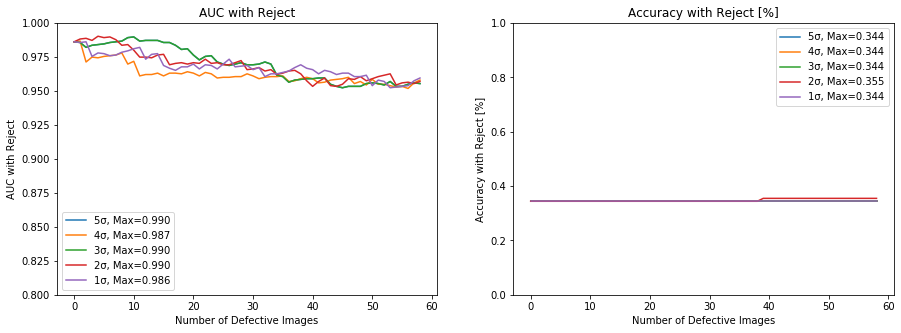

In [6]:
logdirs0 = sorted(glob.glob(dirname + '/*_mbn_*'))
classn = sorted(list(set([d.split('.')[0].split('/')[1] for d in logdirs0])))
# print(classn)
# interact(show_eachresult_reject, classn=classn, n_layer=n_layers, threshold=thresholds)
for c in classn:
    print(c)
    #show_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([1, 2, 3, 4, 5])), ONE=False)
    show_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([1, 2, 3, 4, 5])), ONE=True)
    plt.show()